In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from useful_functions.plotter import plot

In [ ]:
# Let's look at the time series of each of the cases, tests, hospitalizations for all states (log scale)
# to get an idea of how much they will suffer from discreteness effects

In [196]:
# Load in cases, hospitalizations, tests, etc. on state x time basis

death_increases = pd.read_csv('../DL/data/us_df_deathIncrease_cleaned (2).csv', index_col='date')
positive_test_increases = pd.read_csv('../DL/data/us_df_positiveIncrease_cleaned (2).csv', index_col='date')
stringency = pd.read_csv('../DL/data/us_df_stringency_cleaned.csv', index_col='date')
populations = pd.read_csv('../data/US_States/TrackTheRecovery/GeoIDs - State.csv', index_col='statefips')
hosp_increases = pd.read_csv('../DL/data/us_df_hospitalizedIncrease_cleaned.csv', index_col='date')

In [197]:
death_inc_pc = death_increases.copy()
hosp_inc_pc = hosp_increases.copy()
for state in death_increases.columns[1:]:
    death_inc_pc.loc[:,state] /= (populations.loc[int(state), 'state_pop2019'] / 1e6)
        
for state in hosp_increases.columns[1:]:
    hosp_inc_pc.loc[:,state] /= (populations.loc[int(state), 'state_pop2019'] / 1e6)

Text(0, 0.5, 'Hospitalizations per 1 million (14-day rolling)')

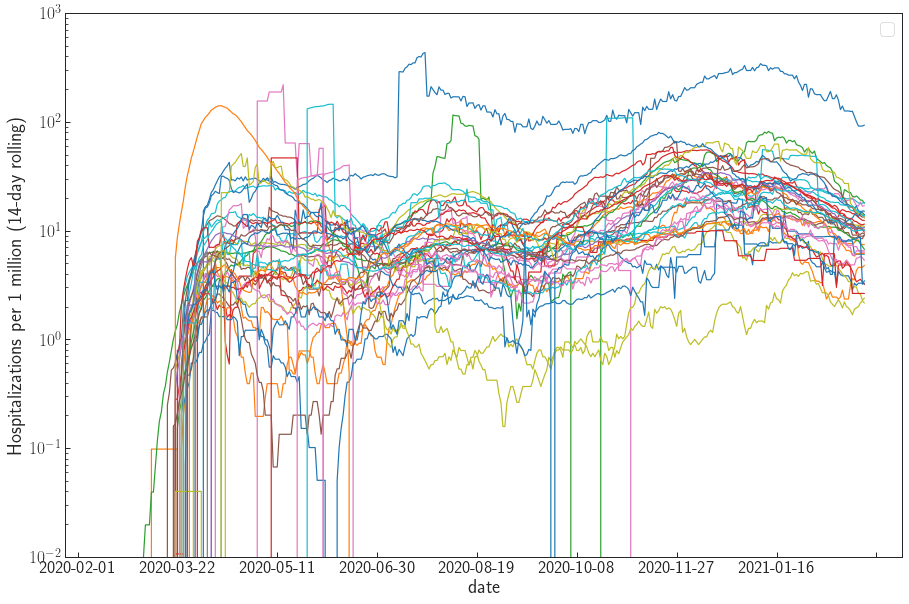

In [202]:
ax = hosp_inc_pc.rolling(14).mean().plot(figsize=(15,10))
ax.semilogy()
ax.legend([],[])
ax.set_ylim(10**-2,10**3)
ax.set_ylabel(r'Hospitalizations per 1 million (14-day rolling)')

Text(0, 0.5, 'Deaths per 1 million (14-day rolling)')

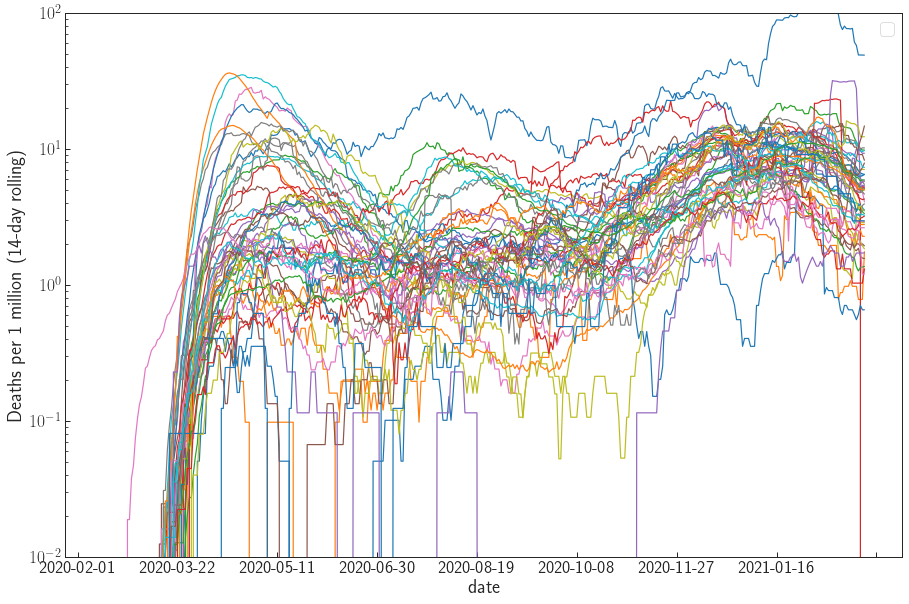

In [204]:
ax = death_inc_pc.rolling(14).mean().plot(figsize=(15,10))
ax.semilogy()
ax.legend([],[])
ax.set_ylim(10**-2,10**2)
ax.set_ylabel(r'Deaths per 1 million (14-day rolling)')

In [171]:
import scipy
import scipy.cluster.hierarchy as sch

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

<AxesSubplot:>

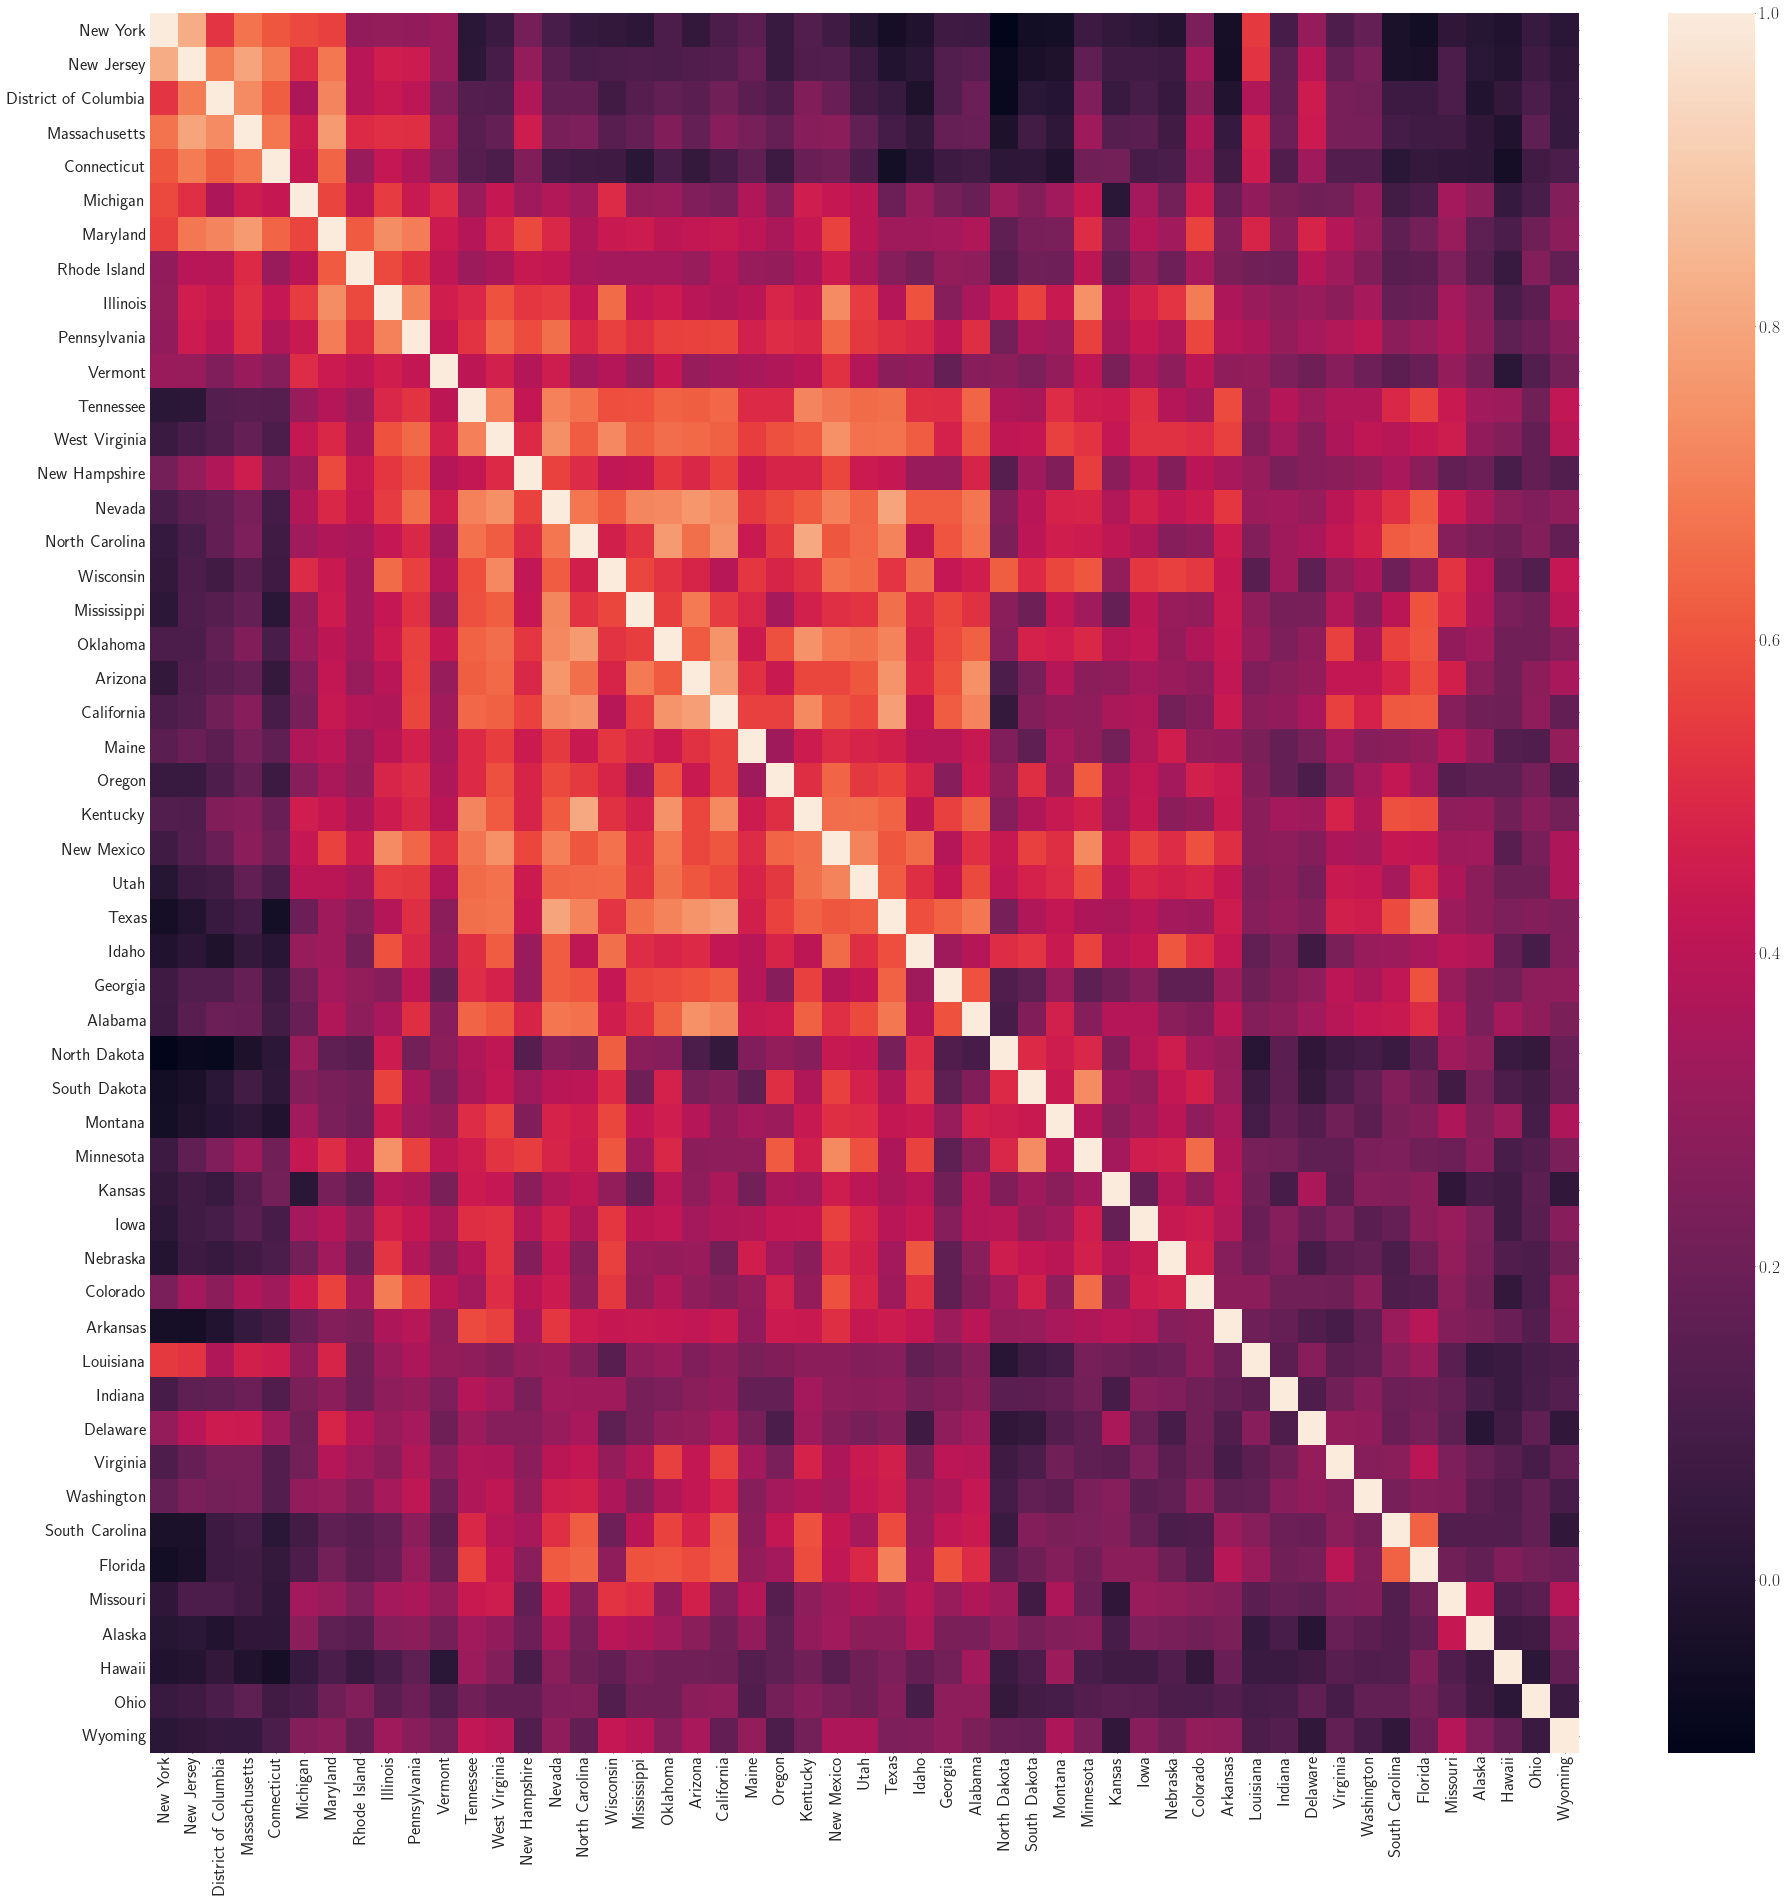

In [172]:
# Using state names for the correlation matrix

dct = populations['statename'].to_dict()
new_dct = {}
for d in dct:
    new_dct[str(d)] = dct[d]
    

death_inc_pc_names = death_inc_pc.rename(columns=new_dct)

fig, ax = plot(figsize=(32,32))

cm = death_inc_pc_names.corr()
sns.heatmap(cluster_corr(cm))

In [205]:
pd.read_csv('../DL/data/states_unstacked.csv')

,Unnamed: 0,date,Stringency,positiveIncrease,deathIncrease,hospitalizedIncrease,totalTestsPeopleViralIncrease
0,1,2020-02-01,0.00,0.0,0.0,0.0,0.0
1,1,2020-02-02,5.56,0.0,0.0,0.0,0.0
2,1,2020-02-03,5.56,0.0,0.0,0.0,0.0
3,1,2020-02-04,5.56,0.0,0.0,0.0,0.0
4,1,2020-02-05,5.56,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
20140,56,2021-02-25,61.11,214.0,0.0,3.0,364.0
20141,56,2021-02-26,61.11,148.0,0.0,4.0,477.0
20142,56,2021-02-27,61.11,0.0,0.0,0.0,0.0
20143,56,2021-02-28,61.11,44.0,0.0,1.0,0.0


In [174]:
# so the things that we need properly stored:
# 1. Stringency
# 2. cases, tests, deaths, hospitalizations
# 3. Shadow index loading

# each needs to be for each state and each date

# We probably want to smooth out the cases, tests, deaths, hospitalizations and make them be per-capita
# Let's look at hospitalizations / positive cases

In [193]:
death_by_hosp = death_inc_pc.rolling(28).mean() / hosp_inc_pc.rolling(28).mean()
#death_by_hosp = death_inc_pc / hosp_inc_pc

(0.0, 2.0)

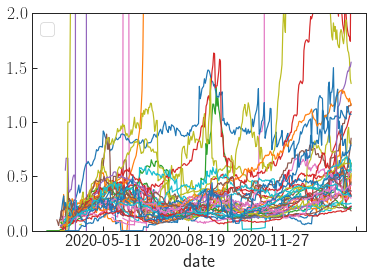

In [194]:
death_by_hosp.plot()
plt.legend([],[])
plt.ylim(0,2)

# What is going on with the pink one?
# That one is CT... Why does it look like that

In [ ]:
# Want to compute how informative the stringency is 